In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Real Trajectory 

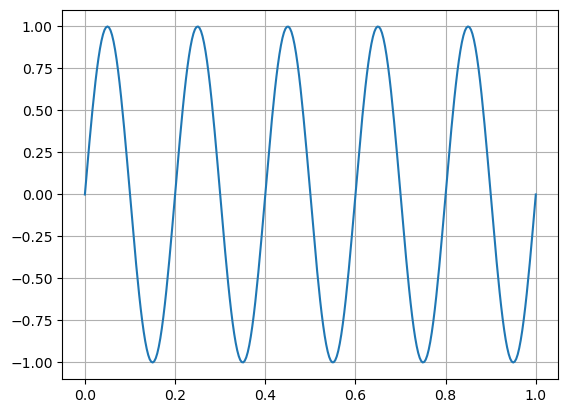

In [7]:
t = np.linspace(0,1,300)
f0 = 5
x_t = np.cos(2*np.pi*f0*t-np.pi/2)
plt.grid()
plt.plot(t,x_t);

### Add noise to the real trajectory

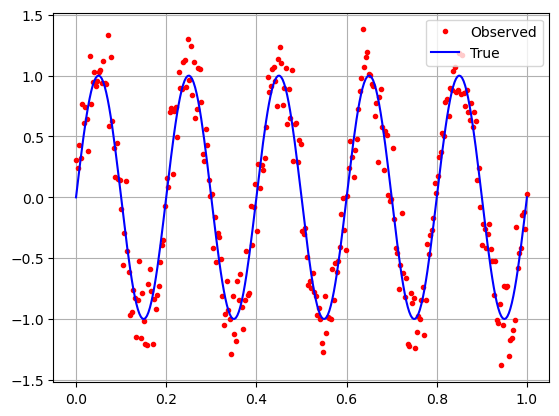

In [13]:
obs_error = 0.22
y = x_t + np.random.randn(x_t.size)*obs_error

plt.plot(t,y,'r.',label='Observed')
plt.plot(t,x_t,'b',label='True')
plt.grid()
plt.legend();

### Filter

In [14]:
x_b = np.zeros(x_t.size) # Background states vector
x_b[0] = 0.2 # Initial guess
x_a = x_b # Analysis states vector
P_b = np.zeros(x_t.size) # Background error covariance matrix
mod_error = 0.01 # Model error
P_b[0] = mod_error # Initial guess
P_a = P_b # Analysis error covariance matrix
H = 1 # Observation operator
R = obs_error**2 # Observation error covariance matrix
M = 1 # Model propagation operator (model equations)

for k in range(1,len(t[1:])+1):
    # Forecast step
    x_b[k] = M*x_a[k-1]
    P_b[k] = M*P_a[k-1]*M + mod_error
    # Analysis step
    K = P_b[k]* H / (H*P_b[k]*H+R)
    x_a[k] = x_b[k] + K*(y[k]-H*x_b[k])
    P_a[k] = (1-K*H) * P_b[k]

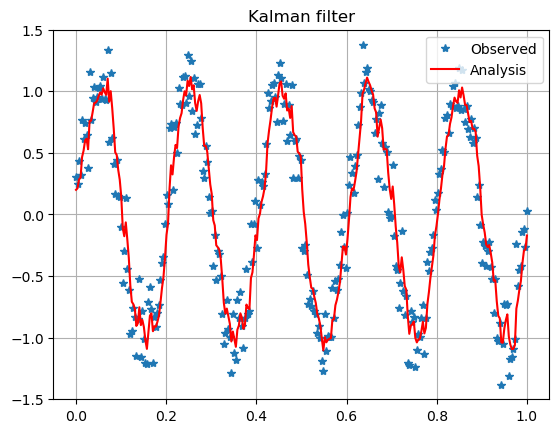

In [17]:
plt.plot(t,y,'*',label='Observed')
plt.plot(t,x_a,'r',label='Analysis')
plt.ylim(-1.5, 1.5)
plt.grid()
plt.title('Kalman filter')
plt.legend();